In [1]:
import numpy as np
import matplotlib.pyplot as plt
import GPy

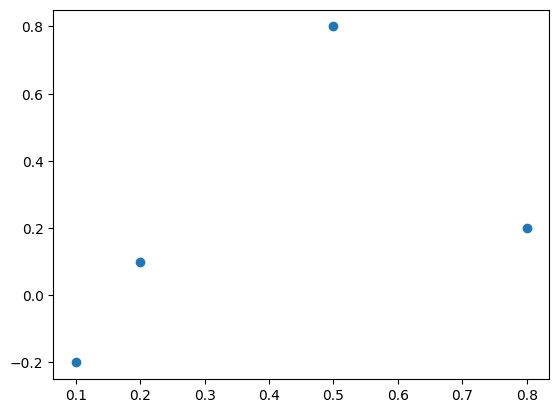

In [2]:
X_init = np.array([0.1,0.2,0.5,0.8])
Y_init = np.array([-0.2,0.1,0.8,0.2])

plt.scatter(X_init,Y_init)

In [3]:
lengthscale_gp = 0.2
variance_gp = 1**2

kernel = GPy.kern.RBF(input_dim=1,lengthscale= lengthscale_gp,variance=variance_gp)  #np.sqrt(res[0])
m = GPy.models.GPRegression(X_init.reshape(-1,1), Y_init.reshape(-1,1),kernel)
m.Gaussian_noise.variance.fix(10**(-5))

array([0])

{'dataplot': [<matplotlib.collections.PathCollection at 0x7fcf35929e50>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x7fcf3593c3d0>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7fcf3593c670>]}

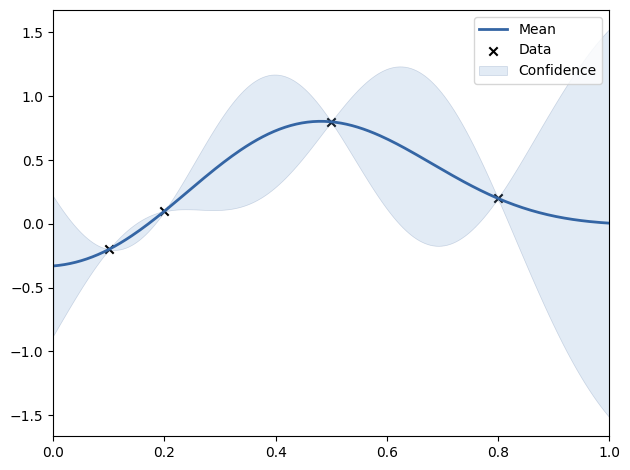

In [4]:
m.plot([0,1])

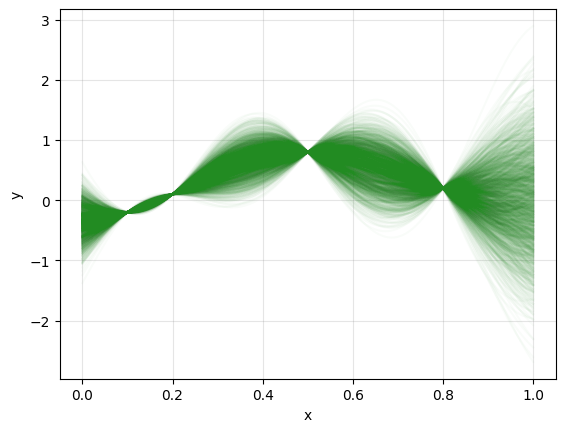

In [6]:
X_total = np.linspace(0,1,400).reshape(-1,1)
for _ in range(2000):
    sample_gp = m.posterior_samples_f(X_total,size=1).reshape(-1,1)
    plt.plot(X_total,sample_gp,color='forestgreen',alpha=0.025)

plt.xlabel('x',fontsize=10)
plt.ylabel('y',fontsize=10)


plt.grid(color='grey',alpha=0.2)
#plt.legend()
plt.savefig('GP1D.pdf',format='pdf')

SlogGP

In [13]:
variance_loggp = 0.01**2
lengthscale_loggp = 0.2
mean_loggp = np.log(1/0.01)
C = 1/0.01

In [14]:
kernel = GPy.kern.RBF(input_dim=1,lengthscale= lengthscale_loggp,variance=1)  #np.sqrt(res[0])
m = GPy.models.GPRegression(X_init.reshape(-1,1), Y_init.reshape(-1,1),kernel)
m.Gaussian_noise.variance.fix(10**(-5))

array([0])

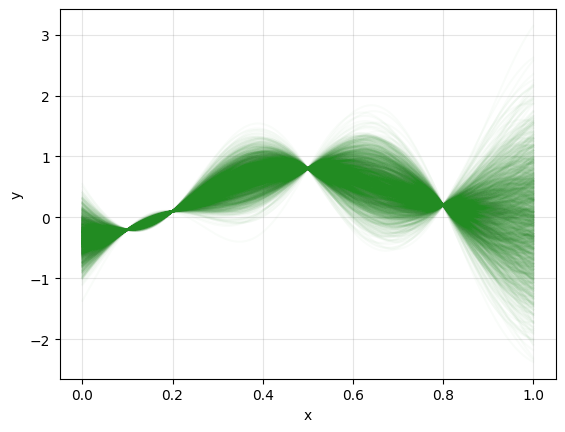

In [16]:
X_total = np.linspace(0,1,400).reshape(-1,1)
for _ in range(2000):
    sample_gp = m.posterior_samples_f(X_total,size=1).reshape(-1,1)
    sample_loggp = np.exp(sample_gp*0.01+mean_loggp)-C
    plt.plot(X_total,sample_loggp,color='forestgreen',alpha=0.025)
    
plt.xlabel('x',fontsize=10)
plt.ylabel('y',fontsize=10)


plt.grid(color='grey',alpha=0.2)
#plt.legend()
plt.savefig('SlogGP1D_0.01.pdf',format='pdf')

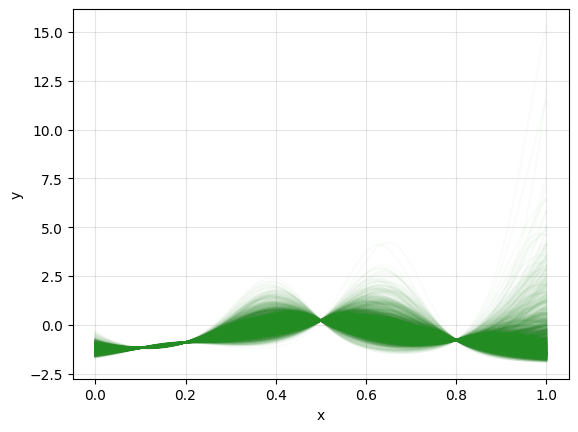

In [17]:
X_total = np.linspace(0,1,400).reshape(-1,1)
for _ in range(2000):
    sample_gp = m.posterior_samples_f(X_total,size=1).reshape(-1,1)
    sample_loggp = np.exp(sample_gp)-2
    plt.plot(X_total,sample_loggp,color='forestgreen',alpha=0.025)
    
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)

#plt.title('logGP ($\sigma^2=1$)')
plt.grid(color='grey',alpha=0.2)
#plt.legend()
plt.savefig('SlogGP1D_1.pdf',format='pdf')